In [1]:
import matplotlib.pyplot as plt
from result_utils import (
    read_all_csvs, 
)

In [2]:
def plot_best_accuracy_per_layer(model_ids: list[str], results_folder="../results/boolean", include_baseline=True, lw=1):
    tasks = ["english-french&antonyms", "english-french&capitalize", "singular-plural&capitalize"]
    fig, axss = plt.subplots(len(model_ids), 3, figsize=(6*1.5, 1.5*2*len(model_ids)), dpi=200, sharex='row', sharey=True)
    for model_idx, model_id in enumerate(model_ids):
        axs = axss if len(model_ids) == 1 else axss[model_idx]
        for task_idx, task in enumerate(tasks):
            # ax = axs[task_idx // 3][task_idx % 3]
            ax = axs[task_idx]

            ####################

            # load and plot conceptor results
            try:
                df = read_all_csvs(f"{results_folder}/{model_id}_{task}_conceptor_baseline")
                df = df[df.experiment == "Average"]
                df_max = df.groupby('layer').max().reset_index()
                ax.plot(df_max.layer, df_max.final_accuracy, label='conceptor (baseline)', lw=lw, ls="-")
            except:
                pass
            # load and plot conceptor results
            df = read_all_csvs(f"{results_folder}/{model_id}_{task}_conceptor_boolean")
            df = df[df.experiment == "Average"]
            df_max = df.groupby('layer').max().reset_index()
            ax.plot(df_max.layer, df_max.final_accuracy, label='conceptor (boolean)', lw=lw, ls="-")
            # load and plot conceptor results
            df = read_all_csvs(f"{results_folder}/{model_id}_{task}_conceptor_booleanand")
            df = df[df.experiment == "Average"]
            df_max = df.groupby('layer').max().reset_index()
            ax.plot(df_max.layer, df_max.final_accuracy, label='conceptor (boolean &)', lw=lw, ls="--")

            ####################

            # load and plot conceptor results
            try:
                df = read_all_csvs(f"{results_folder}/{model_id}_{task}_addition_baseline")
                df = df[df.experiment == "Average"]
                df_max = df.groupby('layer').max().reset_index()
                ax.plot(df_max.layer, df_max.final_accuracy, label='addition (baseline)', lw=lw, ls="-")
            except:
                pass
            # load and plot conceptor results
            try:
                df = read_all_csvs(f"{results_folder}/{model_id}_{task}_addition_merged")
                df = df[df.experiment == "Average"]
                df_max = df.groupby('layer').max().reset_index()
                ax.plot(df_max.layer, df_max.final_accuracy, label='addition (avgd)', lw=lw, ls="-")
            except:
                pass

            ####################

            # plot baseline results
            if include_baseline:
                ax.plot(df_max.layer, [0] * len(df_max.layer), label='baseline', lw=lw, ls='--', color='red')
            if task_idx == 2:
                # ax.legend(bb loc='upper left')
                # move legend to the right of the plot, outside
                ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            if task_idx == 0:
                model_dict = {"gpt-j-6B": "GPT-J (6B)", "gpt-neox-20b": "GPT-NeoX (20B)"}
                ax.set_ylabel(model_dict.get(model_id, model_id))
            ax.set_xlabel('layer')
            ax.set_title(task)
    plt.tight_layout()
    plt.show()

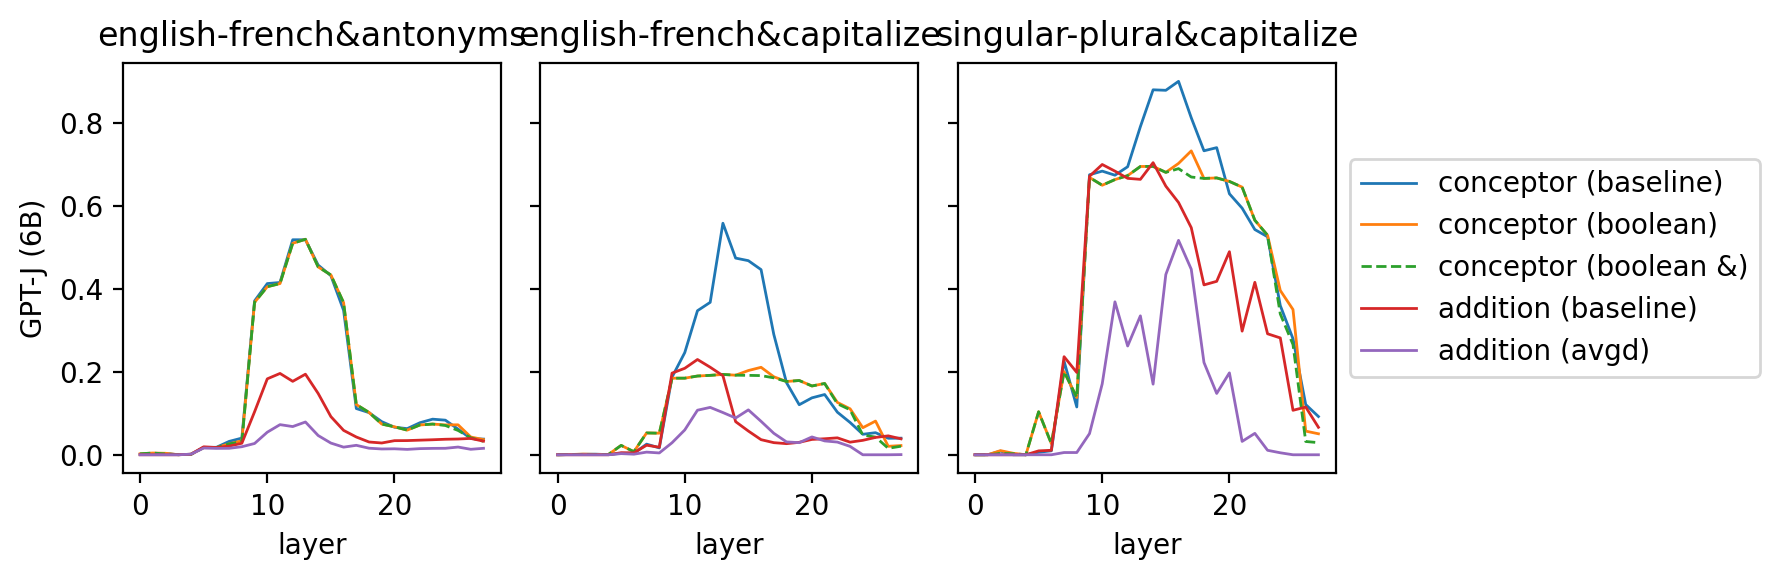

In [3]:
plot_best_accuracy_per_layer(['gpt-j-6B'], include_baseline=False)